<a href="https://colab.research.google.com/github/Aehteshaam-Shaikh/Health-Insurance-Cross-Sell-Production/blob/main/Copy_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [51]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [171]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [114]:
# importing the dataset
health_df = pd.read_csv('/content/drive/MyDrive/Health Insurance Cross Sell Prediction - Aehteshaam Shaikh/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [115]:
# Let's see how the dataset looks like
health_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [116]:
# basic information about the dataset
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB




*   The Dataset consist of 381109 entries with 12 features
*   Out of these 12 features, 9 are numeric while 3 are of object type.



In [117]:
# dropping the not required 'id' column
health_df.drop('id',inplace=True,axis=1)

In [118]:
# checking for the duplicate values
health_df.duplicated().sum()

269

*   No duplicated values are present in the dataset

In [119]:
# checking for the Null Values
health_df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

*   **Luckily, the dataset doesn't have any feature with Null Values!!!**

In [120]:
health_df.describe(include='all')

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


#**Let's do some EDA**

##Univariate Analysis

In [121]:
# Target Variable
health_df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

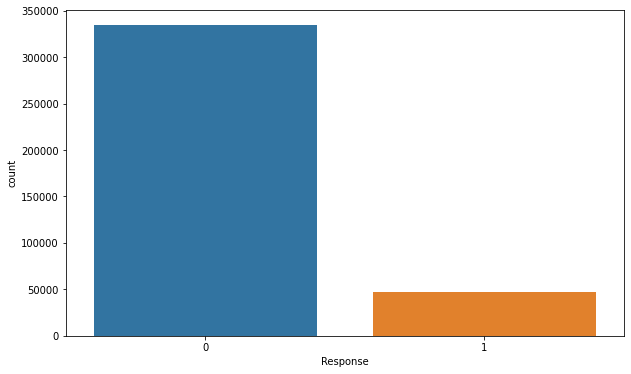

In [122]:
# plotting the Response column 
plt.figure(figsize=(10,6))
sns.countplot(health_df['Response']);

* **The Target variable is highly imbalance with maximum customers having no interest in insurance policy.**

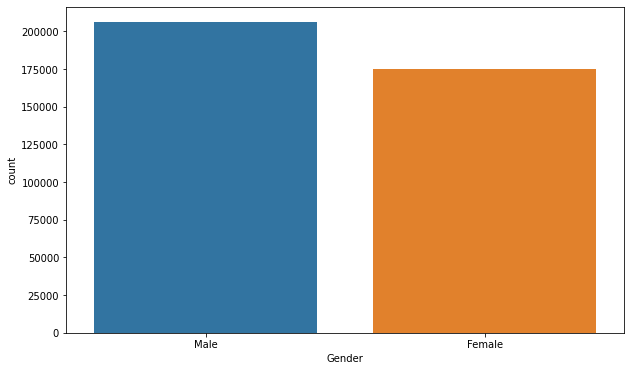

In [123]:
# plotting the Gender column to get the count of males and females 
plt.figure(figsize=(10,6))
sns.countplot(health_df['Gender']);



*   **As we can see the Male Policyholders are more(slightly) than Female policyholders**




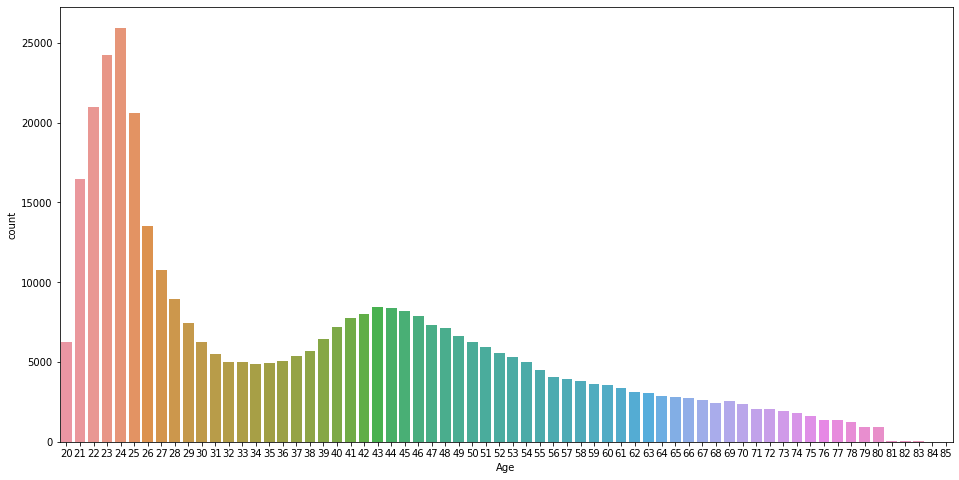

In [124]:
# plotting the Age column 
plt.figure(figsize=(16,8))
sns.countplot(health_df['Age']);

*   **The Age of policyholders ranges from 20 to 80.**



1    380297
0       812
Name: Driving_License, dtype: int64

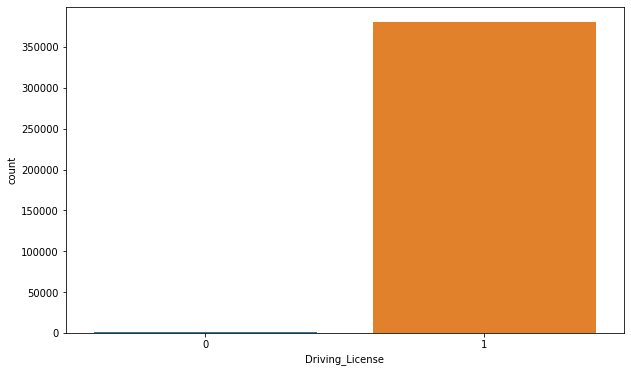

In [125]:
# plotting the Driving_License column 
plt.figure(figsize=(10,6))
sns.countplot(health_df['Driving_License']);
health_df['Driving_License'].value_counts()

* **Maximum policyholders acquire a driving licence.** 

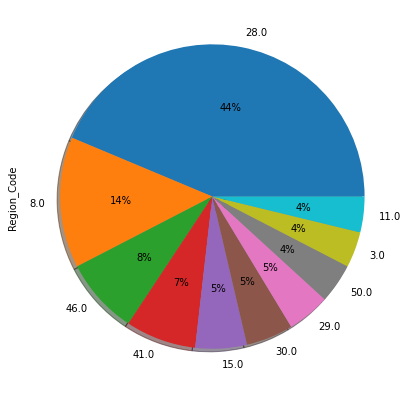

In [126]:
# plotting the Region_Code column with it's top 10 entries. 
plt.figure(figsize=(14,7))
health_df['Region_Code'].value_counts().nlargest(10).plot(kind='pie',autopct='%.0f%%',shadow = True);


* **Most of the policyholders belong to the region that has region code 28.**

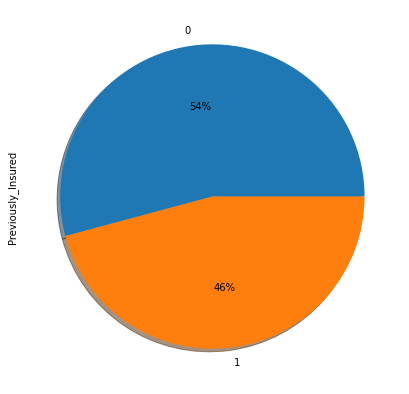

In [127]:

# plotting the Previously_Insured column 
plt.figure(figsize=(14,7))
health_df['Previously_Insured'].value_counts().plot( kind='pie',autopct='%.0f%%',shadow = True);

* **Around 54% of the customers does not have the vehicle insurance while 46% of the customers already have it.**

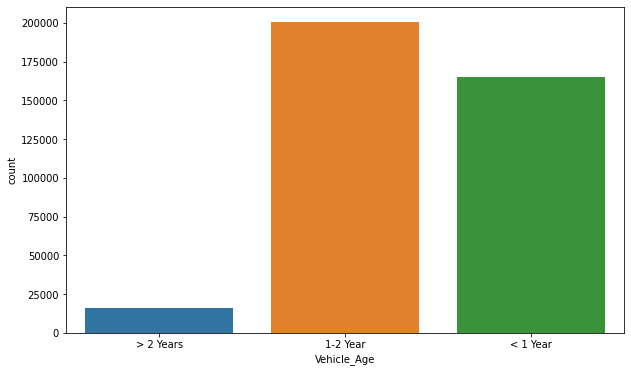

In [128]:
# plotting the Vehicle_Age column 
plt.figure(figsize=(10,6))
sns.countplot(health_df['Vehicle_Age']);

* **Most of the customers have vehicles that are 1-2 years old.**
* **Very few customers have a vehicle more than 2 years old.**

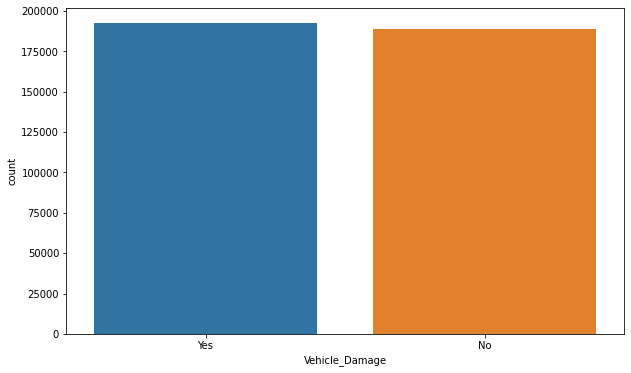

In [129]:
# plotting the Vehicle_Damage column 
plt.figure(figsize=(10,6))
sns.countplot(health_df['Vehicle_Damage']);

* **The plot shows that the number of customers who damaged their vehicles and the ones who didn't are almost equal.**

#Multivariate Analysis

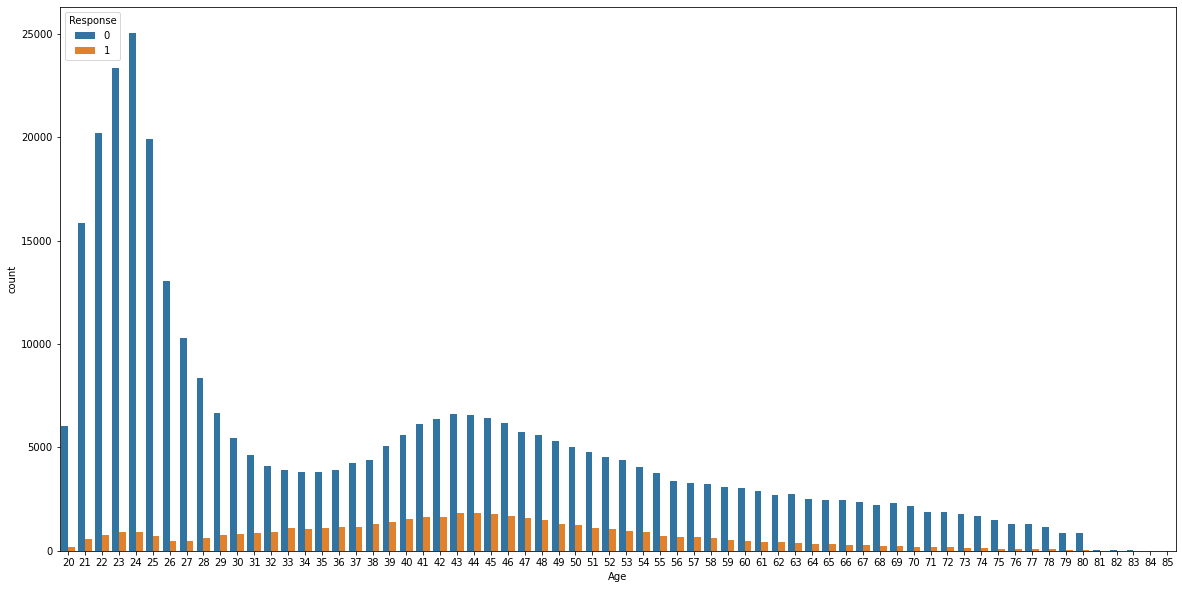

In [130]:
#Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=health_df);

* **People aged between 30-60 are more likely to be interested in the insurance policy**

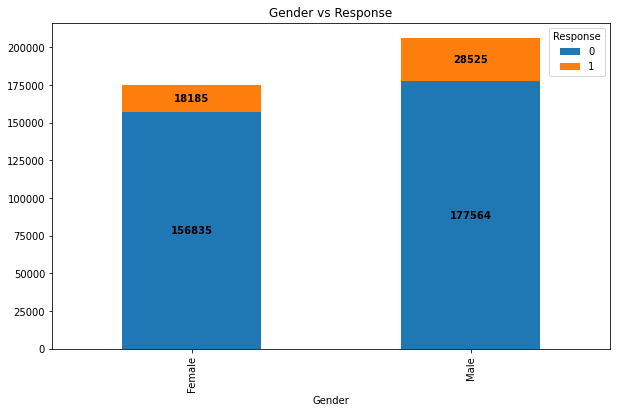

In [131]:
# Relationship b/w target variable and Gender column
ct = pd.crosstab(health_df['Gender'],health_df['Response']) 
ax = ct.plot(kind='bar',stacked=True,figsize=(10,6));
ax.legend(title='Response',loc='upper right');
plt.title('Gender vs Response')

# getting the centered labels for each bar
for c in ax.containers:
  labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
  ax.bar_label(c, labels=labels, label_type='center',fontweight='bold')


* **The above plot shows the genderwise distribution of customers who are interested or not in the insurance policy.**
* **Male customers' proportion is higher in both types of response than Female customers**

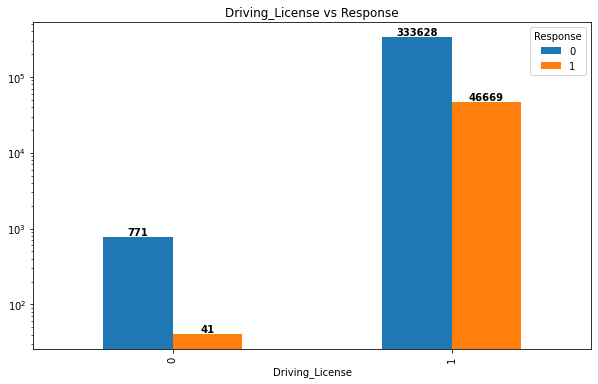

In [132]:
# Relationship b/w target variable and Driving_License column

ct = pd.crosstab(health_df['Driving_License'],health_df['Response']) 
ax = ct.plot(kind='bar',figsize=(10,6));
plt.yscale("log")
ax.legend(title='Response',loc='upper right');
plt.title('Driving_License vs Response')
for c in ax.containers:
  labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
  ax.bar_label(c, labels=labels, label_type='edge',fontweight='bold')


* **From the customers who have D.L., only 12.3% of them are interested in insurance policy**
* **From the above plot,we can observe that 41 customers who do not have a driving licence are also interested in the insurance policy..**

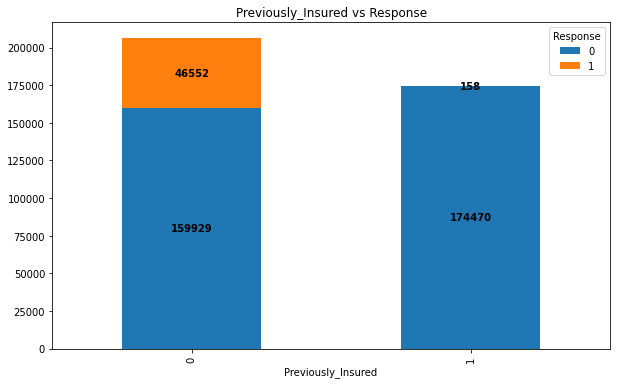

In [133]:
# Relationship b/w target variable and Previously_Insured column
ct = pd.crosstab(health_df['Previously_Insured'],health_df['Response']) 
ax = ct.plot(kind='bar',stacked=True,figsize=(10,6));
ax.legend(title='Response',loc='upper right');
plt.title('Previously_Insured vs Response')

# getting the centered labels for each bar
for c in ax.containers:
  labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
  ax.bar_label(c, labels=labels, label_type='center',fontweight='bold')


* **Of the customers who were previously not insured, 46552 of them are interested in the policy, while the majority of them are not interested.
And also, among the customers who were previously insured, the majority of them are not interested in the policy.**

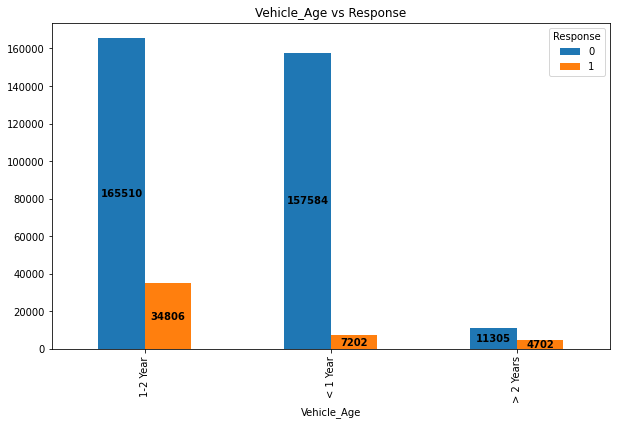

In [134]:
# Vehicle_Age
ct = pd.crosstab(health_df['Vehicle_Age'],health_df['Response']) 
ax = ct.plot(kind='bar',figsize=(10,6));
ax.legend(title='Response',loc='upper right');
plt.title('Vehicle_Age vs Response')

# getting the centered labels for each bar
for c in ax.containers:
  labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
  ax.bar_label(c, labels=labels, label_type='center',fontweight='bold')

* **The majority of customers interested in the insurance policy have vehicles that are 1 to 2 years old, followed by those with vehicles that are less than 1 year old.**

* **Very few customers are interested in the policy if they have more than two-year-old vehicles.** 

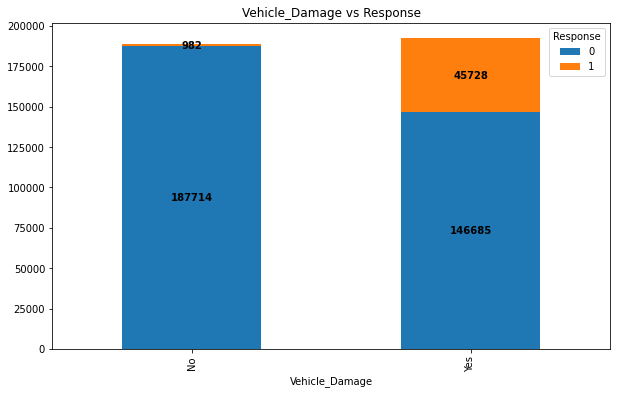

In [135]:
# Vehicle_Damage

ct = pd.crosstab(health_df['Vehicle_Damage'],health_df['Response']) 
ax = ct.plot(kind='bar',stacked=True,figsize=(10,6));
ax.legend(title='Response',loc='upper right');
plt.title('Vehicle_Damage vs Response')

# getting the centered labels for each bar
for c in ax.containers:
  labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
  ax.bar_label(c, labels=labels, label_type='center',fontweight='bold')

* **If we observe the number of customers who are interested in the insurance policy, then the maximum number of them are those who have had vehicle damage in the past.**

Text(0.5, 1.0, 'Vintage vs Annual_Premium')

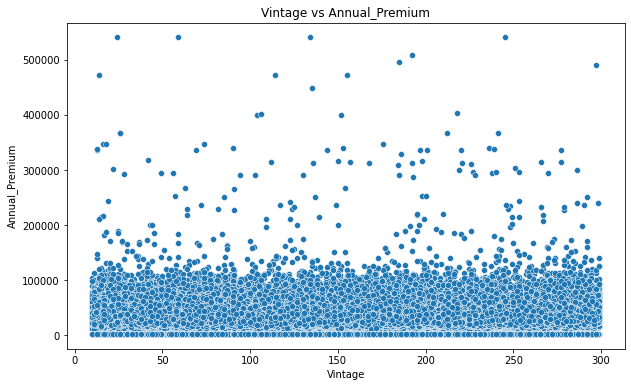

In [136]:
# number of Days, Customer has been associated with the company vs Annual premium
plt.figure(figsize=(10,6))
sns.scatterplot(x=health_df['Vintage'],y=health_df['Annual_Premium']);
plt.title('Vintage vs Annual_Premium')

In [137]:
numerical_features = health_df.describe().columns

In [138]:
# since these columns are categorigal in nature we will have to drop them
numerical_features=numerical_features.drop(['Response','Driving_License','Previously_Insured'])

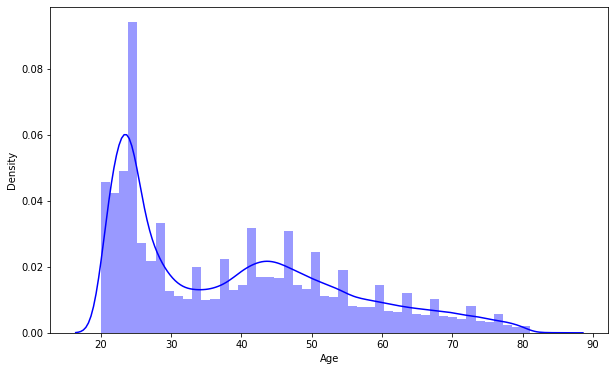

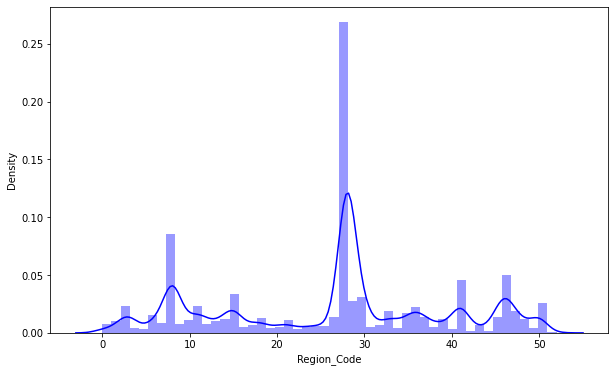

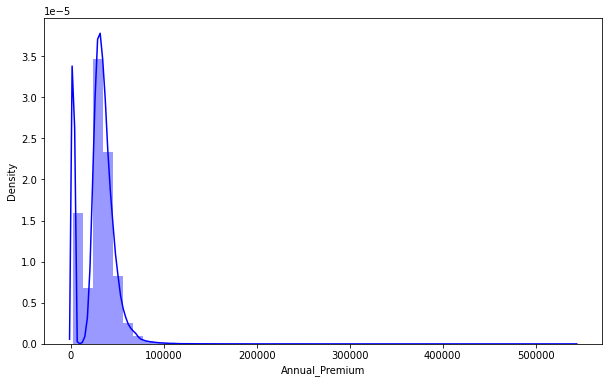

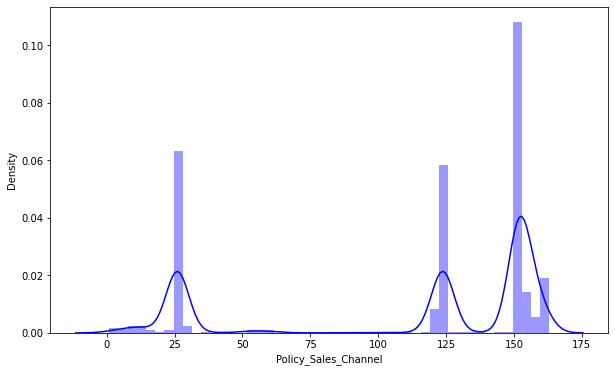

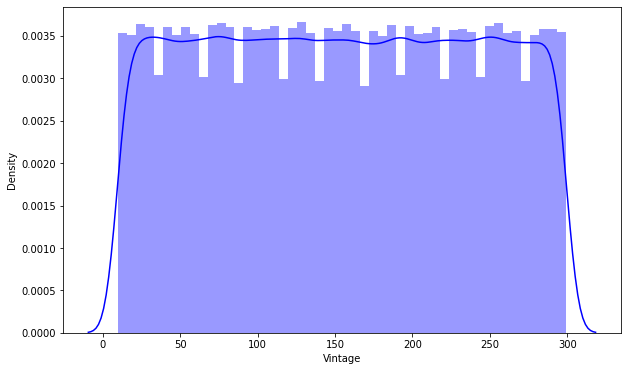

In [139]:
# plotting the numerical features
for feature in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot((health_df[feature]),color='b')
  plt.xlabel(feature)

In [140]:
#checking the outliers
Q1 = health_df.quantile(0.25)
Q3 = health_df.quantile(0.75)
IQR = Q3 - Q1

((health_df < (Q1 - 1.5 * IQR)) | (health_df > (Q3 + 1.5 * IQR))).sum()

Age                         0
Annual_Premium          10320
Driving_License           812
Gender                      0
Policy_Sales_Channel        0
Previously_Insured          0
Region_Code                 0
Response                46710
Vehicle_Age                 0
Vehicle_Damage              0
Vintage                     0
dtype: int64

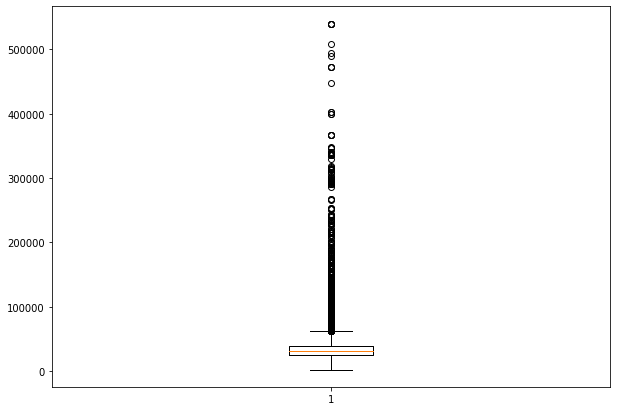

In [141]:
plt.figure(figsize=(10,7))
plt.boxplot(health_df['Annual_Premium']);

#Feature Engineering

In [142]:
# Feature encoding
health_df['Gender'] = health_df['Gender'].map({'Male':0,'Female':1})
health_df['Vehicle_Damage'] = health_df['Vehicle_Damage'].map({'No':0,'Yes':1})


In [143]:
#separating the dependent and independent variables
y=health_df['Response']
x=health_df.drop(columns='Response')

In [144]:
x.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217
1,0,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183
2,0,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27
3,0,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203
4,1,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39


###One hot encoding:

In [145]:
# Performing one hot encoding on the dependent variables
x=pd.get_dummies(x)
x.shape

(381109, 12)

In [146]:
x.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,44,1,28.0,0,1,40454.0,26.0,217,0,0,1
1,0,76,1,3.0,0,0,33536.0,26.0,183,1,0,0
2,0,47,1,28.0,0,1,38294.0,26.0,27,0,0,1
3,0,21,1,11.0,1,0,28619.0,152.0,203,0,1,0
4,1,29,1,41.0,1,0,27496.0,152.0,39,0,1,0


In [147]:
# Merging the columns 'Vehicle_Age_1-2 Year' and 'Vehicle_Age_> 2 Years'
x['Vehicle_Age > 1 Year'] = x['Vehicle_Age_1-2 Year']+x['Vehicle_Age_> 2 Years']

In [148]:
x.drop(['Vehicle_Age_1-2 Year','Vehicle_Age_> 2 Years'],inplace=True, axis=1)

In [149]:
x.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_< 1 Year,Vehicle_Age > 1 Year
0,0,44,1,28.0,0,1,40454.0,26.0,217,0,1
1,0,76,1,3.0,0,0,33536.0,26.0,183,0,1
2,0,47,1,28.0,0,1,38294.0,26.0,27,0,1
3,0,21,1,11.0,1,0,28619.0,152.0,203,1,0
4,1,29,1,41.0,1,0,27496.0,152.0,39,1,0


###Feature Selection:

In [150]:
# using f-scores to do feature selection
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [151]:
#finding the f scores of each feature
f_scores = f_regression(x, y)
f_scores

(array([1.05091307e+03, 4.76694479e+03, 3.93066928e+01, 4.25827356e+01,
        5.02033540e+04, 5.47422454e+04, 1.94317587e+02, 7.51301151e+03,
        4.20468707e-01, 1.75608711e+04, 1.75608711e+04]),
 array([3.18074235e-230, 0.00000000e+000, 3.62583438e-010, 6.78391651e-011,
        0.00000000e+000, 0.00000000e+000, 3.72231514e-044, 0.00000000e+000,
        5.16703652e-001, 0.00000000e+000, 0.00000000e+000]))

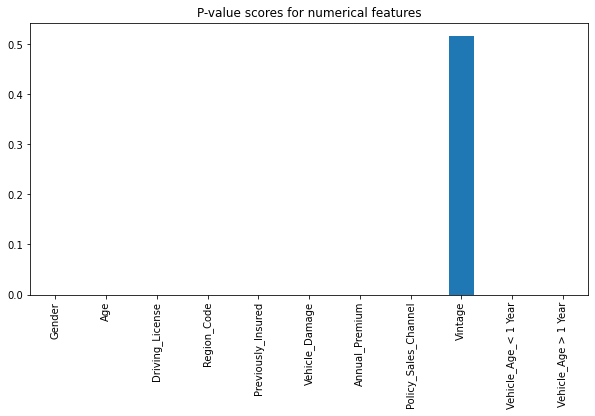

In [152]:
#Plotting the p-values 
p_values= pd.Series(f_scores[1],index= x.columns)
plt.figure(figsize=(10,5))
p_values.plot(kind='bar')
plt.title('P-value scores for numerical features')
plt.show()

In [153]:
# dropping the features with high p-value i.e. 'vintage' column
selected_features = np.where(p_values<0.005)[0]
x=x.iloc[0:,selected_features]

In [154]:
x.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age > 1 Year'],
      dtype='object')

<AxesSubplot:>

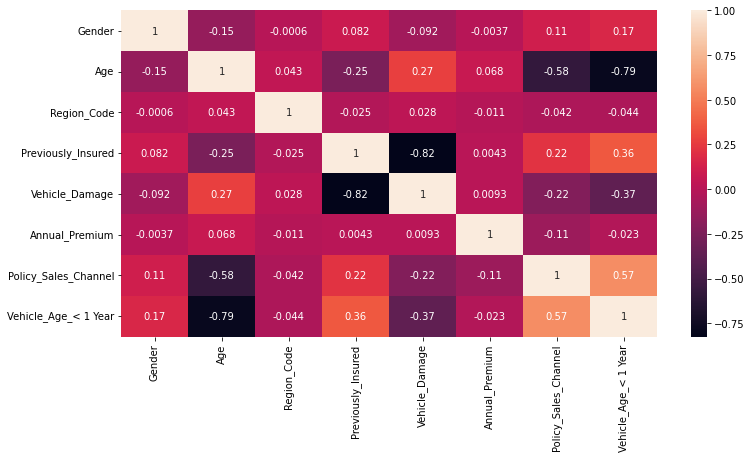

In [269]:
# plotting the heatmap.
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.heatmap(x.corr(),annot=True)

In [156]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = x.columns
   vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
 
   return(vif)

In [162]:
calc_vif(x)

,variables,VIF
0,Gender,1.904104
1,Age,18.630317
2,Driving_License,50.522693
3,Region_Code,4.956974
4,Previously_Insured,5.740876
5,Vehicle_Damage,6.303273
6,Annual_Premium,4.207972
7,Policy_Sales_Channel,8.291642
8,Vehicle_Age_< 1 Year,5.147757


In [158]:
x.drop(['Vehicle_Age > 1 Year'],axis=1,inplace=True)

In [271]:
calc_vif(x)

,variables,VIF
0,Gender,1.878612
1,Age,8.874903
2,Region_Code,4.642246
3,Previously_Insured,5.063777
4,Vehicle_Damage,5.263804
5,Annual_Premium,4.022495
6,Policy_Sales_Channel,6.676893
7,Vehicle_Age_< 1 Year,4.122312


In [163]:
x.drop(['Driving_License'],axis=1,inplace=True)

#Handling Imbalanced data

Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


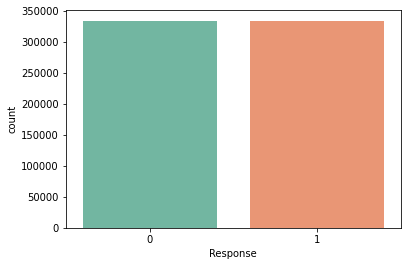

In [165]:
from imblearn.over_sampling import RandomOverSampler
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_resample(x,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='Set2');

In [237]:
#dividing the dataset into training and testing

x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.30,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)


(266776, 8) (114333, 8) (266776,) (114333,)


## Training a Random Forest Classifier

In [238]:
from sklearn.ensemble import RandomForestClassifier

In [169]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [254]:
# # Create an instance of the RandomForestClassifier
# rf_model = RandomForestClassifier()

# # Grid search
# rf_grid = GridSearchCV(estimator=rf_model,
#                        param_grid = param_dict,
#                        cv = 5, verbose=2, scoring='roc_auc')


rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   7.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   6.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   6.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   6.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   6.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  11.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  10.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  10.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  10.9s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [255]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=50, min_samples_split=100)

In [256]:
rf_optimal_model = rf_grid.best_estimator_

In [258]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(x_train)
test_class_preds = rf_optimal_model.predict(x_test)

In [259]:
# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(x_train)[:,1]
test_preds = rf_optimal_model.predict_proba(x_test)[:,1]

In [260]:
len(train_preds)

468158

In [261]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.7966925696025701
The accuracy on test dataset is 0.795524322169059


In [262]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [263]:
train_cm

array([[153887,  80184],
       [ 14996, 219091]])

In [264]:
test_cm

array([[65696, 34632],
       [ 6394, 93918]])

In [265]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

In [266]:
train_auc

0.8539154263682651

In [267]:
test_auc

0.8525889659137106

In [273]:
features = x_train.columns
importances = rf_optimal_model.feature_importances_
indices = np.argsort(importances)

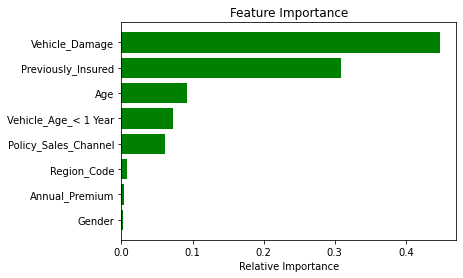

In [275]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [277]:
# Using SMOTE technique of balancing the datset
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=46, sampling_strategy=1.0)
x_smote, y_smote = sm.fit_resample(x, y)

In [278]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_smote, y_smote, test_size=0.2, random_state=11)

#Logistic Regression Model

In [284]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(random_state=123)
log_reg.fit(x_train_sm, y_train_sm)

accuracy_train_logreg, accuracy_test_logreg = log_reg.score(x_train_sm, y_train_sm),log_reg.score(x_test_sm, y_test_sm)

print('Accuracy on Train Data : {:.3f}'.format(accuracy_train_logreg)) 
print('Accuracy on Test Data  : {:.3f}'.format(accuracy_test_logreg))

Accuracy on Train Data : 0.803
Accuracy on Test Data  : 0.803


##Hyperparameter Tuning

In [286]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": [1e-06, 1e-05, 1e-04, 1e-03],
              "penalty": ['l1','l2'],
              "max_iter":[400,450,500]
             }

grid_cv = GridSearchCV(estimator=log_reg, param_grid=parameters, cv=3)
grid_cv.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=123),
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001],
                         'max_iter': [400, 450, 500], 'penalty': ['l1', 'l2']})

In [287]:
# getting the best parameters
best_params = grid_cv.best_params_
print('Best parameters: ',best_params)

Best parameters:  {'C': 0.001, 'max_iter': 400, 'penalty': 'l2'}


In [288]:
# getting the optimal model
lr_optimal_model = grid_cv.best_params_

In [308]:
# Making predictions on train and test data

lr_clf = LogisticRegression(**lr_optimal_model, random_state=123)
lr_clf.fit(x_train_sm, y_train_sm)

test_prediction_proba = lr_clf.predict_proba(x_test_sm)[:,1]
lr_auc = roc_auc_score(y_test_sm, test_prediction_proba)

y_pred_lr = lr_clf.predict(x_test_sm)
lr_precision = precision_score(y_test_sm, y_pred_lr)
lr_recall = recall_score(y_test_sm, y_pred_lr)
print("Precision: {:.2f}%".format(lr_precision))
print("Recall: {:.2f}%".format(lr_recall))

# lr_train_acc, lr_test_acc = print_score(lr_clf)
pred_train = lr_clf.predict(x_train_sm)
train_acc = accuracy_score(y_train_sm, pred_train)
print("Train Accuracy: {:.2f}%".format(train_acc * 100))
    
pred_test = lr_clf.predict(x_test_sm)
test_acc = accuracy_score(y_test_sm, pred_test)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))

Precision: 0.74%
Recall: 0.92%
Train Accuracy: 80.30%
Test Accuracy: 80.31%


In [294]:
# Get the roc_auc score for train and test dataset
lr_train_auc = roc_auc_score(y_train_sm,pred_train)
lr_test_auc = roc_auc_score(y_test_sm,pred_test)

In [295]:
lr_train_auc

0.8030187861463107

In [296]:
lr_test_auc

0.8029773527147479